In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
app = pd.read_pickle('/Users/krystal/Desktop/app_clean.p')
app = app.drop_duplicates()
app.head()

,app,category,comment 1,comment 2,comment 3,current rating,current reviews,description,link,multiple devices,...,overall rating,overall reviews,price,rate 1,rate 2,rate 3,seller,user 1,user 2,user 3
0,"Kindle – Read eBooks, Magazines & Textbooks",Books,Please focus on reading and listening experien...,I can't believe they added a clock in the last...,You guys did an amazing job updating it and co...,2.65152,66,Turn your iPhone or iPad into a Kindle with th...,https://itunes.apple.com/us/app/kindle-read-eb...,Y,...,3.5,245670,Free,2,1,5,AMZN Mobile LLC,LambdaExpression,Lorring,Prellvis
1,"Audible – audio books, original series & podcasts",Books,It's very enjoyable to be able to listen to a ...,"Works great 99% of the time. When it didn't, t...","Audiobooks are a little bit expensive, but I l...",4.65113,1995,"Welcome to Audible. We’re an Amazon company, a...",https://itunes.apple.com/us/app/audible-audio-...,Y,...,4,100917,Free,3,5,5,"Audible, Inc.",Smuckitelly,Scorchedterra,vtalbot
2,Wattpad - Free Books and eBook Reader,Books,I am absolutely *in love* with Wattpad. Not on...,I love this app sooo much I won't be able to l...,I love wattpad! I really do! It's my favorite ...,4.59425,313,"Discover Wattpad:At Wattpad, we’re connecting ...",https://itunes.apple.com/us/app/wattpad-free-b...,Y,...,4.5,236764,Free,3,4,5,Wattpad Corp,dg2017xx,RedPandaWorld,Kajdisksn
3,"NOOK - Read Books, Magazines, Newspapers & Comics",Books,I would give it 5 stars if the App would put t...,Glad to have Nook on my iPad but wish maneuver...,I love reading books electronically. Having un...,4.33955,1072,"Get the FREE NOOK Reading App for your iPad, i...",https://itunes.apple.com/us/app/nook-read-book...,Y,...,4,55593,Free,4,3,3,Barnes&Noble,Morgan737364737,Too old to tap,Rstocky7
4,HOOKED - Chat Stories,Books,Keeps you on the edge of your seat. If you lov...,It's a great app and I love the chills (even i...,I just got through the first three parter and ...,4.54263,129,HOOKED lets you read amazing chat stories FREE...,https://itunes.apple.com/us/app/hooked-chat-st...,Y,...,4.5,28004,Free,4,2,4,Telepathic Inc.,100% Honest Feedback,Abbidon,Gangrel_Bloodfang


In [97]:
len(app)

5894

<b>Categorical Variables</b>

<p>In this part, frequency table for each categorical variable is made.</p>

<b>Category</b>

In [31]:
def frequecy_table(var_name):
    table = pd.DataFrame(app[var_name].value_counts())
    table.reset_index(level = 0, inplace = True)
    table['percentage'] = table[var_name]/table[var_name].sum()
    return table

In [32]:
frequecy_table('category')

,index,category,percentage
0,Games,380,0.064472
1,Lifestyle,327,0.055480
2,Entertainment,271,0.045979
3,News,264,0.044791
4,Health & Fitness,258,0.043773
5,Photo & Video,252,0.042755
6,Sports,252,0.042755
7,Food & Drink,250,0.042416
8,Education,248,0.042077
9,Business,248,0.042077


<b>Multiple Languages</b>

In [33]:
frequecy_table('multiple languages')

,index,multiple languages,percentage
0,N,3087,0.523753
1,Y,2807,0.476247


<b>Price</b>

In [34]:
frequecy_table('price')

,index,price,percentage
0,Free,5730,0.972175
1,$0.99,36,0.006108
2,$2.99,33,0.005599
3,$3.99,27,0.004581
4,$1.99,27,0.004581
5,$4.99,21,0.003563
6,$9.99,8,0.001357
7,$6.99,3,0.000509
8,$5.99,3,0.000509
9,$24.99,1,0.000170


<p>We can find that most apps are free, as a result, we may discard variable 'price' in the following analysis.</p>

<b>Multiple Devices</b>

In [35]:
frequecy_table('multiple devices')

,index,multiple devices,percentage
0,Y,5881,0.997794
1,N,13,0.002206


<p>We can find that most apps are multiple devices, as a result, we may discard variable 'multiple devices' in the following analysis.</p>

<b>Continuous Variables</b>

<p>In this part, for all continuous variables, mean, var, median, range, min value and max value are calculated, density plot is also made for each continuous variable.</p>

<b>Current Rating</b>

In [71]:
def statistics(var_name):
    table = []
    for each in app[var_name]:
        if each != '' and float(each) > 0:
            table.append(float(each))
    mean = np.mean(table)
    var = np.var(table)
    median = np.median(table)
    range_1 = np.max(table) - np.min(table)
    min_1 = np.min(table)
    max_1 = np.max(table)
    dict_1 = {'mean':mean, 'var':var, 'median':median, 'range':range_1, 'min':min_1, 'max':max_1}
    summary_table = pd.DataFrame.from_dict(dict_1, orient='index').T
    return summary_table

In [72]:
statistics('current rating')

,min,max,median,range,var,mean
0,1.0,5.0,4.18182,4.0,0.946402,3.838456


In [92]:
def plot_density(var_name):
    table = []
    for each in app[var_name]:
        if each != '' and float(each) > 0:
            table.append(float(each))
    table = pd.DataFrame(table)
    table.plot(kind = "density") 
    plt.legend(labels = [var_name], loc='upper left')
    plt.title('Distribution of %s'%(var_name))
    plt.show()

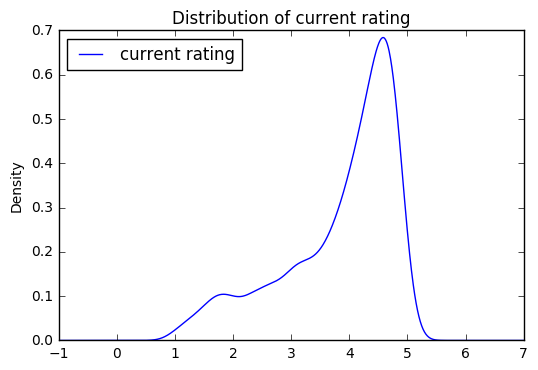

In [93]:
plot_density('current rating')

<b>Current Reviews</b>

In [73]:
statistics('current reviews')

,min,max,median,range,var,mean
0,5.0,111910.0,61.0,111905.0,1.275234e+07,593.843338


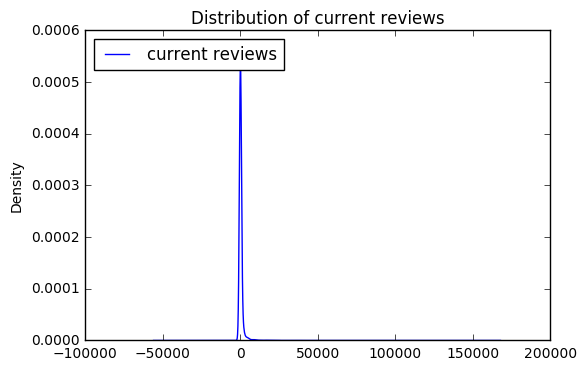

In [94]:
plot_density('current reviews')

<b>Overall Rating</b>

In [74]:
statistics('overall rating')

,min,max,median,range,var,mean
0,1.0,5.0,4.0,4.0,0.656913,3.782541


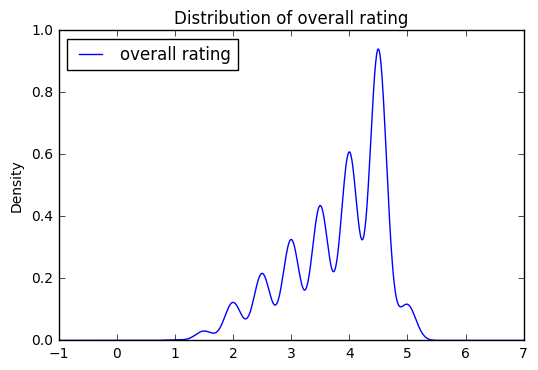

In [95]:
plot_density('overall rating')

<b>Overall Reviews</b>

In [75]:
statistics('overall reviews')

,min,max,median,range,var,mean
0,5.0,2959259.0,1776.5,2959254.0,7.773057e+09,19384.681849


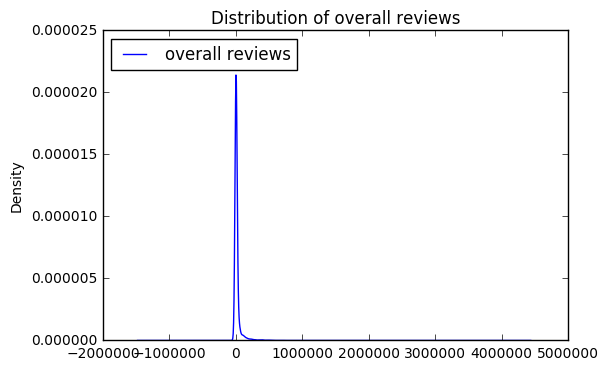

In [96]:
plot_density('overall reviews')

<p>We can see that only variables current reviews and overall reviews generally follow a normal distribution.</p>